In [23]:
import pandas as pd
import numpy as np


In [24]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Removing noise from dataset
# removing sparcity
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

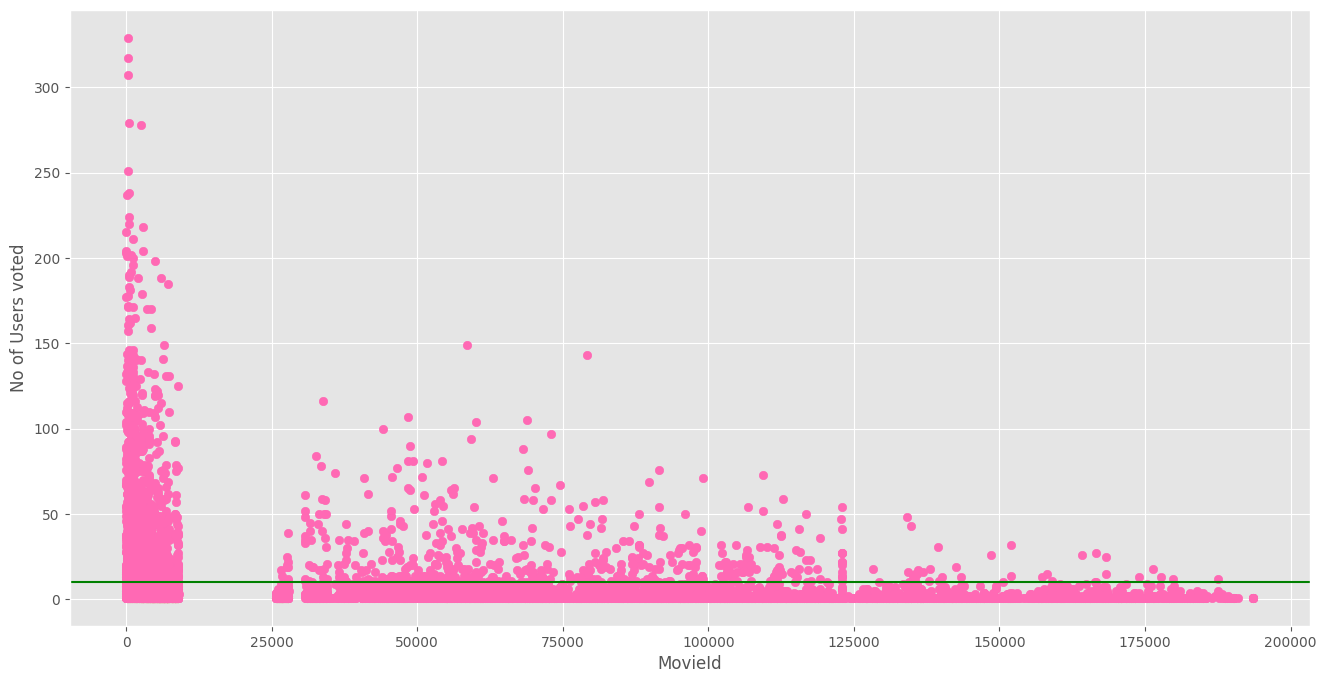

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(1,1,figsize = (16,8))
plt.scatter(no_user_voted.index, no_user_voted, color = 'hotpink')
plt.axhline(y=10, color = 'green')
plt.xlabel('MovieId')
plt.ylabel('No of Users voted')
plt.show()

In [31]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted >10].index, :]

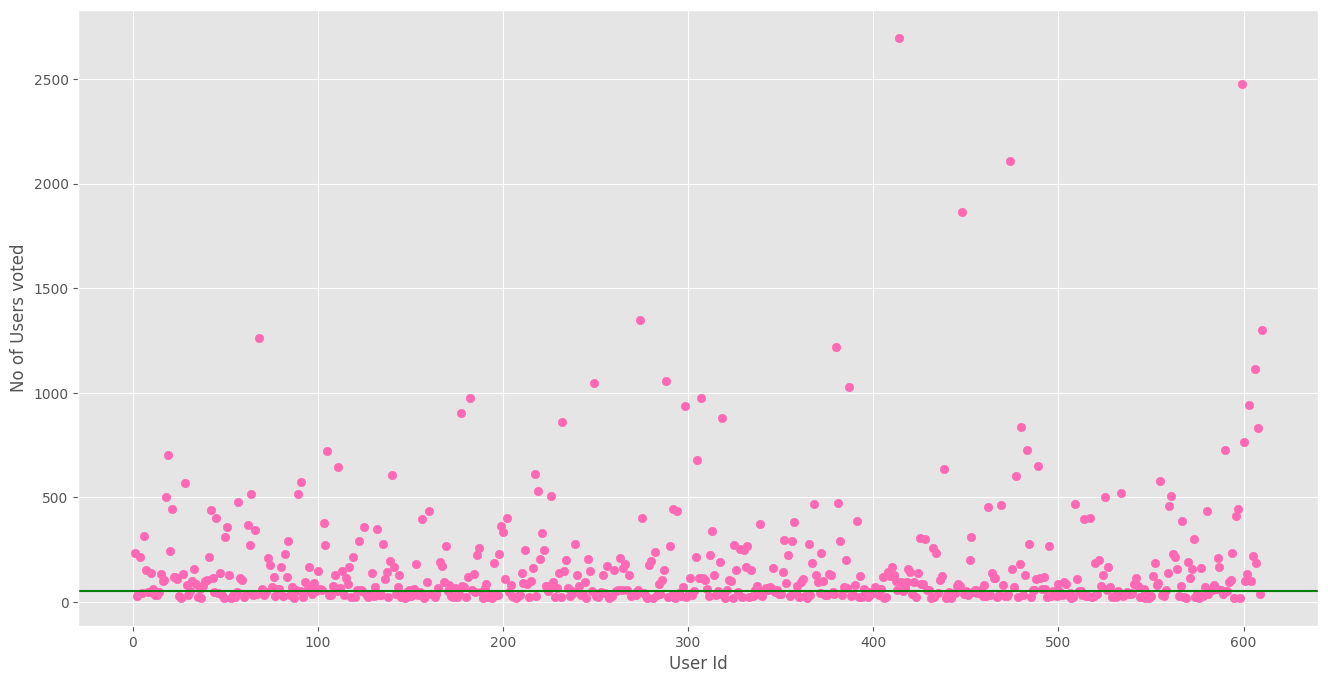

In [32]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,1,figsize = (16,8))
plt.scatter(no_movies_voted.index, no_movies_voted, color = 'hotpink')
plt.axhline(y=50, color = 'green')
plt.xlabel('User Id')
plt.ylabel('No of Users voted')
plt.show()

In [33]:
final_dataset = final_dataset.loc[: ,no_movies_voted[no_movies_voted > 50].index]

In [34]:
final_dataset.shape

(2121, 378)

In [35]:
from scipy.sparse import csr_matrix

In [36]:
csr_data= csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [37]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [38]:
from sklearn.neighbors import NearestNeighbors
 

In [39]:
knn = NearestNeighbors(metric= 'cosine', algorithm='brute', n_neighbors= 20, n_jobs= -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [40]:
def get_recommendation(movie_name):
  movie_list = movies[movies['title'].str.contains(movie_name)]

  if len(movie_list):
    movie_idx = movie_list.iloc[0]['movieId']
    movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
    distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors= 10+1)
    rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    recommended_movies = []
    for val in rec_movies_indices:
      movie_idx = final_dataset.iloc[val[0]]['movieId']
      idx = movies[movies['movieId'] == movie_idx].index
      recommended_movies.append({'Title':movies.iloc[idx]['title'].values[0], 'Distance':val[1]})

    df = pd.DataFrame(recommended_movies, index=range(1,11))
    return df
  else:
    print('Movies not found!!')



In [41]:
import gradio as gr

def recommend_movie (movie_name):
  df = get_recommendation(movie_name)
  if isinstance(df, pd.DataFrame):
    return df.to_string(index=False)
  else:
    return df
  
app = gr.Interface(
  fn = recommend_movie,
  inputs = "text",
  outputs = 'text',
  description = "Enter a movie name to get a list of other movie recomendations"

)

app.launch()
  


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
